In [1]:
import gc
import json
import pandas as pd
import numpy as np

from glob import glob
from tqdm import tqdm

from utils import loadpkl, removeCorrelatedVariables, removeMissingVariables

%matplotlib inline

In [2]:
files = sorted(glob('../features/*.feather'))
df = pd.concat([pd.read_feather(f) for f in tqdm(files, mininterval=60)], axis=1)

# set card_id as index
df.set_index('card_id', inplace=True)
df.head()

  0%|          | 0/1101 [00:00<?, ?it/s]/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pandas/io/feather_format.py:124: FutureWarning: `nthreads` argument is deprecated, pass `use_threads` instead
  nthreads=int_use_threads)
/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/pyarrow/pandas_compat.py:751: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels
100%|██████████| 1101/1101 [00:02<00:00, 506.33it/s]


,AOV,AOV_ratio,CLV,CLV_month_diff,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,Outlier_Likelyhood,amount_month_ratio_max,amount_month_ratio_mean,...,year,year_0,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,182.318395,1.661881,4.690294e+06,1.705895e+08,-0.008053,0.013005,49.492977,0.000273,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0
C_ID_3d0044924f,101.445060,0.159410,1.071890e+07,1.005798e+07,0.000050,0.000047,56.833333,0.001651,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0
C_ID_d639edf6cd,76.651163,0.679063,8.444000e+04,NaN,NaN,0.000367,15.720930,0.003357,NaN,NaN,...,0.015914,0,0,0,0,0,0,1,0,0
C_ID_186d6a6901,118.311688,0.856153,3.805900e+05,NaN,NaN,0.007076,55.623377,0.001447,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0
C_ID_cdbd2c0db2,249.208020,1.067407,2.299008e+06,-9.753155e+07,0.031752,0.078204,61.856099,0.000277,NaN,NaN,...,0.007631,0,0,0,0,0,0,0,1,0


In [3]:
configs = json.load(open('../configs/201_lgbm.json'))
df = df[configs['features']]
df.head()

,target,outliers,AOV_ratio,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,amount_month_ratio_min,amount_month_ratio_ratio,card_id_cnt_ratio,category_1_mean,...,observation_date_ratio,pred_CLV_ratio,price_max,price_mean,price_ratio,purchase_amount_max,purchase_amount_ratio,quarter,weekofyear,year
card_id,,,,,,,,,,,,,,,,,,,,,
C_ID_92a2005557,-0.820283,0.0,1.661881,-0.008053,0.013005,49.492977,-350.00,NaN,0.088462,0.000000,...,0.831091,0.043402,1329.000,11856.00000,NaN,1329.0,0.146973,0.012998,0.012435,0.007631
C_ID_3d0044924f,0.392913,0.0,0.159410,0.000050,0.000047,56.833333,7.99,0.0,0.017143,0.088571,...,0.785113,0.000052,96.250,39.53125,0.332394,1059.0,0.002733,0.017980,0.017699,0.007631
C_ID_d639edf6cd,0.688056,0.0,0.679063,NaN,0.000367,15.720930,NaN,NaN,0.023256,0.000000,...,0.831091,0.000000,NaN,NaN,NaN,431.0,0.015793,0.009038,0.009683,0.015914
C_ID_186d6a6901,0.142495,0.0,0.856153,NaN,0.007076,55.623377,NaN,NaN,0.090909,0.298701,...,0.831091,0.014900,287.250,55.12500,0.906318,1149.0,0.077820,0.009038,0.006126,0.007631
C_ID_cdbd2c0db2,-0.159749,0.0,1.067407,0.031752,0.078204,61.856099,-156.09,NaN,0.270677,0.168338,...,0.831091,0.131382,130.375,104.00000,1.406941,1826.0,0.288818,0.007716,0.007097,0.007631


In [16]:
corr = df.corr()
corr.to_csv('../output/corr.csv')
corr

,AOV,AOV_ratio,CLV,CLV_month_diff,CLV_month_diff_ratio,CLV_ratio,Mothers_Day_2018,Outlier_Likelyhood,amount_month_ratio_max,amount_month_ratio_mean,...,year,year_0,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018
AOV,1.000000,0.222370,0.011381,-0.005872,0.001151,0.002765,0.016731,0.021990,0.534675,0.749277,...,-0.031272,NaN,-0.001914,-0.017677,-0.034363,-0.020848,0.024220,-0.028978,0.026574,0.004434
AOV_ratio,0.222370,1.000000,0.000836,0.000941,0.058139,0.059970,-0.022074,0.019011,0.047098,0.130168,...,0.010837,NaN,0.001719,-0.000134,0.002374,0.003841,0.012526,0.002330,-0.010528,0.012773
CLV,0.011381,0.000836,1.000000,0.154823,-0.017069,-0.020874,0.012351,-0.023354,0.148076,0.010108,...,0.093087,NaN,-0.001496,-0.009591,-0.009216,-0.013027,0.013682,0.125006,-0.114513,-0.004181
CLV_month_diff,-0.005872,0.000941,0.154823,1.000000,-0.002146,-0.002657,0.011431,-0.016887,0.296368,0.107774,...,0.017656,NaN,-0.000088,-0.001801,-0.002627,0.001260,0.003717,0.021030,-0.021294,-0.000555
CLV_month_diff_ratio,0.001151,0.058139,-0.017069,-0.002146,1.000000,0.683888,-0.021999,-0.015289,-0.010662,-0.006418,...,-0.003223,NaN,-0.000315,0.001124,0.003168,-0.003294,0.000363,-0.003930,0.003720,0.001867
CLV_ratio,0.002765,0.059970,-0.020874,-0.002657,0.683888,1.000000,-0.009621,-0.013073,-0.011086,-0.006771,...,-0.009603,NaN,-0.000370,0.000569,0.001797,-0.005107,0.000813,-0.010395,0.010117,0.006216
Mothers_Day_2018,0.016731,-0.022074,0.012351,0.011431,-0.021999,-0.009621,1.000000,-0.297950,0.566592,0.448637,...,-0.226198,NaN,-0.000477,-0.032684,-0.032917,-0.038949,-0.073182,-0.196027,0.235708,0.011949
Outlier_Likelyhood,0.021990,0.019011,-0.023354,-0.016887,-0.015289,-0.013073,-0.297950,1.000000,-0.022556,-0.028989,...,0.137813,-0.000491,0.001013,0.017410,0.015261,0.047355,0.068468,0.088611,-0.135435,-0.004752
amount_month_ratio_max,0.534675,0.047098,0.148076,0.296368,-0.010662,-0.011086,0.566592,-0.022556,1.000000,0.822423,...,-0.155905,NaN,-0.004934,-0.030018,-0.033356,-0.033735,-0.031130,-0.129303,0.161660,0.010359
amount_month_ratio_mean,0.749277,0.130168,0.010108,0.107774,-0.006418,-0.006771,0.448637,-0.028989,0.822423,1.000000,...,-0.110663,NaN,-0.003703,-0.024710,-0.032948,-0.022772,-0.009999,-0.096327,0.114190,0.007949


In [4]:
# split test & train
train_df = df[df['target'].notnull()]
test_df = df[df['target'].isnull()]

In [5]:
# Kolmogorov-Smirnov statistic on 2 samples

from scipy.stats import ks_2samp
list_p_value =[]

for c in tqdm(train_df.columns.tolist()):
    list_p_value.append(ks_2samp(test_df[c] , train_df[c])[1])

Se = pd.Series(list_p_value, index = train_df.columns.tolist()).sort_values() 
list_discarded = list(Se[Se < .1].index)

100%|██████████| 198/198 [00:06<00:00, 31.18it/s]


In [6]:
list_discarded

['target',
 'outliers',
 'purchase_amount_max',
 'new_category_2_mean_mean',
 'hist_purchase_amount_sum',
 'category_2_mean',
 'hist_pred_CLV',
 'new_AOV',
 'new_purchase_amount_mean',
 'hist_purchase_amount_max',
 'new_hour_mean',
 'dayofweek',
 'new_hour_min',
 'hist_category_2_mean_mean',
 'hist_category_3_mean',
 'category_3_mean',
 'hist_installments_mean']

In [9]:
df.drop(list_discarded, axis=1, inplace=True)

In [11]:
features_json = {}
features_json['features'] = df.columns.tolist()
with open('../configs/tmp_features.json', 'w') as f:
    json.dump(features_json, f, indent=4)

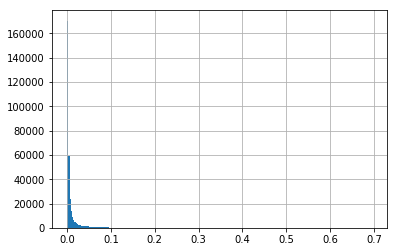

In [8]:
df.Outlier_Likelyhood.hist(bins=255)

In [21]:
corr['target'].sort_values().dropna()

outliers                                -0.896187
Outlier_Likelyhood                      -0.260876
hist_observation_date                   -0.161670
new_observation_date                    -0.161531
observation_date                        -0.161182
hist_month_diff_unapproved_sum          -0.130712
hist_duration_sum                       -0.127694
hist_duration_approved_sum              -0.116697
hist_duration_unapproved_sum            -0.110719
new_purchase_date_uptomin               -0.109221
new_time_recency                        -0.109098
hist_month_diff_unapproved_max          -0.107950
duration_max                            -0.107800
new_purchase_date_uptonow               -0.104960
new_recency                             -0.104960
hist_month_diff_max                     -0.104379
hist_month_diff_sum                     -0.103671
hist_month_diff_approved_max            -0.103545
month_diff_max                          -0.101834
hist_duration_max                       -0.100804
